In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [30]:
# Chargement du dataset IRIS
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Extraction des attributs
X = iris["data"]
y = iris["target"]
target_names = iris["target_names"]

# affectation de chaque atrtribut (sépales + petal) 
sepal_length = X[:, 0]
sepal_width = X[:, 1]
petal_length = X[:, 2]

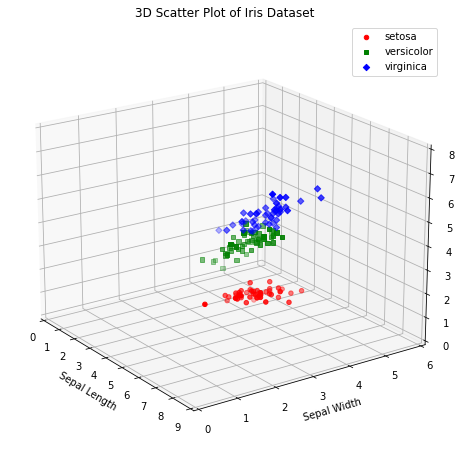

In [31]:
# Création de la figure + axe 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour chaque espèce d'Iris
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
# Points pour chaque espèce
for i, (color, marker) in enumerate(zip(colors, markers)):
    indices = np.where(y == i)
    ax.scatter(sepal_length[indices],
                sepal_width[indices],
               petal_length[indices], 
                c=color,
                marker=marker, 
                label=target_names[i])

# Définition des étiquettes des axes et le titre
ax.legend()
ax.set_xlim(0, 9)
ax.set_ylim(0, 6)
ax.set_zlim(0, 8)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

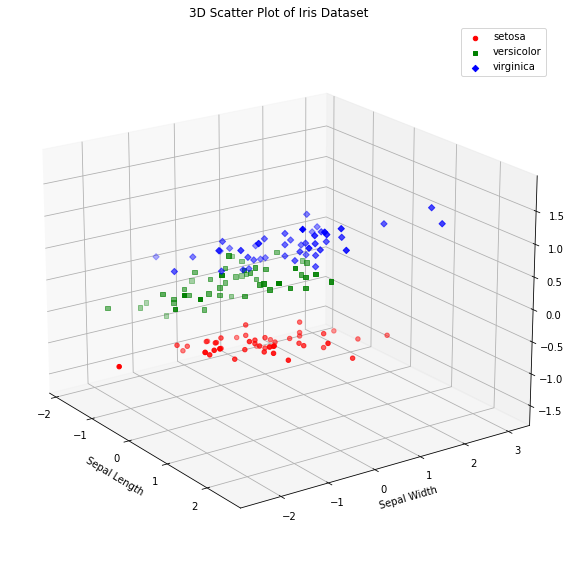

In [32]:
# Centrer et réduire les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# affectation de chaque attribut (sépales + petal) 
sepal_length = data_scaled[:, 0]
sepal_width = data_scaled[:, 1]
petal_length = data_scaled[:, 2]

# Création de la figure + axe 3D avec les données centrés et réduis
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(right=1)
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour chaque espèce d'Iris
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
# Points pour chaque espèce
for i, (color, marker) in enumerate(zip(colors, markers)):
    indices = np.where(y == i)
    ax.scatter(sepal_length[indices],
                sepal_width[indices],
               petal_length[indices], 
                c=color,
                marker=marker, 
                label=target_names[i])

# Définition des étiquettes des axes et le titre
ax.legend()
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

In [33]:
# Réduction de dimensionnalité en PCA
pca = PCA(n_components=2)  # Réduction en 2 dimensions
X_pca = pca.fit_transform(X)

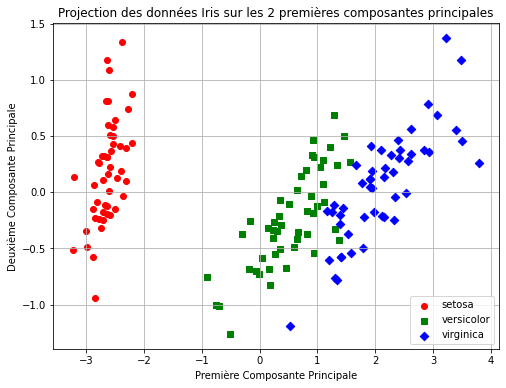

In [34]:
# Représentation de la réduction de dimensions 
plt.figure(figsize=(8, 6))

# Couleur des points en fonction de leurs vrais labels pour voir la séparation des classes (clusters)
for label, color, marker, target_name in zip(np.unique(iris["target"]), ['r', 'g', 'b'], markers, iris["target_names"]):
    plt.scatter(X_pca[iris["target"] == label, 0],  # Coordonnées x des points avec le label actuel
                X_pca[iris["target"] == label, 1],  # Coordonnées y des points avec le label actuel
                marker=marker,
                color=color,
                label=target_name)

plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Projection des données Iris sur les 2 premières composantes principales')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Avec standardisation (centrées, réduites)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)  # Réduction en 2 dimensions
X_pca = pca.fit_transform(X_standard)

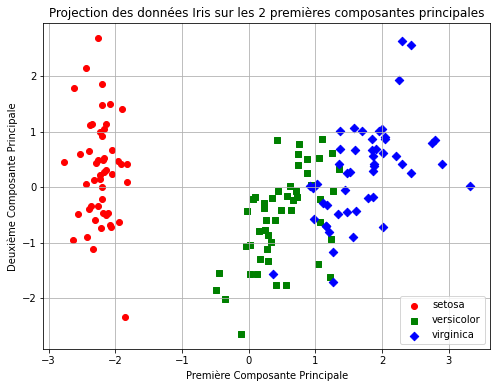

In [ ]:
plt.figure(figsize=(8, 6))

# Couleur des points en fonction de leurs vrais labels pour voir la séparation des classes
for label, color, marker, target_name in zip(np.unique(iris["target"]), ['r', 'g', 'b'], markers, iris["target_names"]):
    plt.scatter(X_pca[iris["target"] == label, 0],  # Coordonnées x des points avec le label actuel
                X_pca[iris["target"] == label, 1],  # Coordonnées y des points avec le label actuel
                color=color,
                marker=marker,
                label=target_name)

plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Projection des données Iris sur les 2 premières composantes principales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Matrice de corrélation des variables
df = pd.DataFrame(X, columns=iris["feature_names"])
correlation_matrix = df.iloc[:, 0:3].corr()
correlation_matrix_full = df.corr()

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,-0.11757,0.871754
sepal width (cm),-0.117570,1.00000,-0.428440
petal length (cm),0.871754,-0.42844,1.000000


In [ ]:
correlation_matrix_full

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


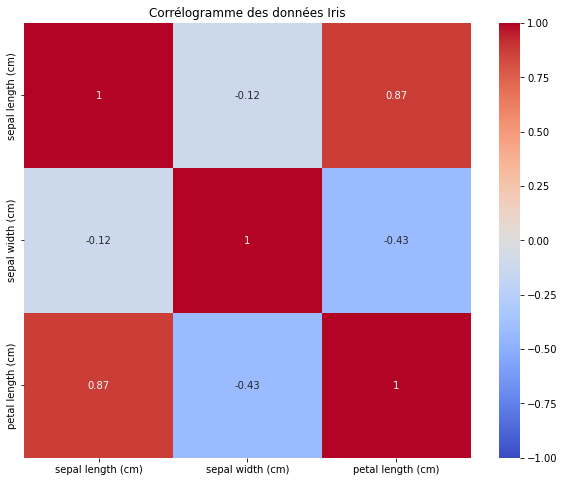

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,      # Affiche les valeurs de corrélation
            cmap="coolwarm", # Choix de la palette de couleurs
            vmin=-1,         # Fixe la valeur minimale de la barre de couleurs à -1
            vmax=1)          # Fixe la valeur maximale de la barre de couleurs à 1
plt.title('Corrélogramme des données Iris')
plt.show()

In [ ]:
# Liste des différentes caractéristiques (variables) de chaque type d'iris
feature_names = iris.feature_names

# matrice de corrélations bivariées (avec numpy)
corr_matrix = np.corrcoef(X, rowvar=False)

In [ ]:
# Matrice de corrélation
df = pd.DataFrame(X, columns=feature_names)
corr_matrix = df.corr()

x = []
y = []
size = []
color = []

for i, feature1 in enumerate(feature_names):
    for j, feature2 in enumerate(feature_names):
        x.append(feature1)
        y.append(feature2)
        size.append(abs(corr_matrix.iloc[i, j]) * 100)  # Multiplier par 100 pour ajuster la taille des bulles
        color.append(corr_matrix.iloc[i, j])

# Bubble Chart avec plotly.graph_objects
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=size,
        color=color,
        colorscale='Viridis',
        sizemode='diameter',
        showscale=True
    ),
    text=np.around(color, 2)
))

fig.update_layout(
    title='Bubble Chart des corrélations entre les variables du dataset IRIS',
    xaxis_title='Variable',
    yaxis_title='Variable',
    yaxis_autorange='reversed',  # Inverser l'axe des ordonnées pour une meilleure lisibilité
    hovermode='closest'
)

fig.show()

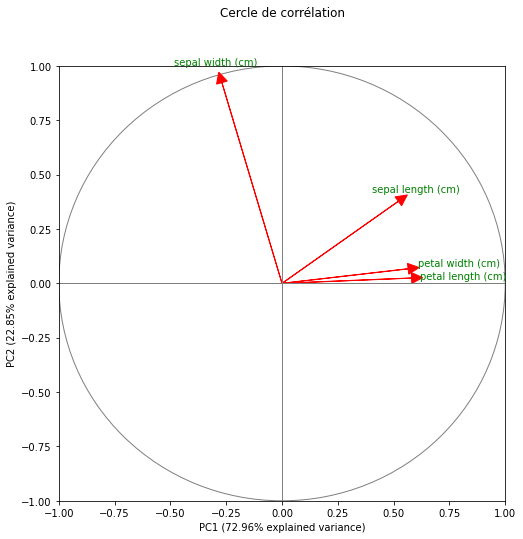

In [40]:
# Cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))

# Limiter les axes au cercle de rayon 1
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axvline(0, color='grey', lw=1)
ax.axhline(0, color='grey', lw=1)

# Affichage du cercle
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
ax.add_artist(circle)

# Affichage des vecteurs correspandant aux caractéristiques de chaque type d'iris.
ax.arrow(
    0, 0, 
    pca.components_[0, 0], 
    pca.components_[1, 0], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 0]*1.15, 
    pca.components_[1, 0]*1.15, 
    df_iris.columns[0], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 1], 
    pca.components_[1, 1], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 1]*1.10, 
    pca.components_[1, 1]*1.10, 
    df_iris.columns[1], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 2], 
    pca.components_[1, 2], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 2]*1.40, 
    pca.components_[1, 2]*1.40, 
    df_iris.columns[2], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 3], 
    pca.components_[1, 3], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 3]*1.40, 
    pca.components_[1, 3]*1.40, 
    df_iris.columns[3], 
    color='green', ha='center', va='center')


plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} explained variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} explained variance)')
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')
ax.set_title("Cercle de corrélation", y=1.10)
plt.show()

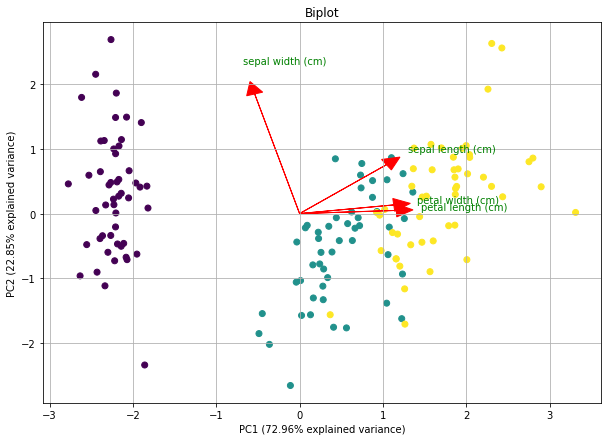

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)  # scatter plot des scores (observations)

# Ajouter les vecteurs de loadings pour chaque variable
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x * 2, y * 2, head_width=0.2, head_length=0.2, fc='r', ec='r')
    plt.text(x * 2.5, y * 2.5, iris.feature_names[i], color='g')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} explained variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} explained variance)')
plt.title('Biplot')
plt.grid()
plt.show()